# 녹색 옷 입은 애가 젤다지?
- https://www.acmicpc.net/problem/4485

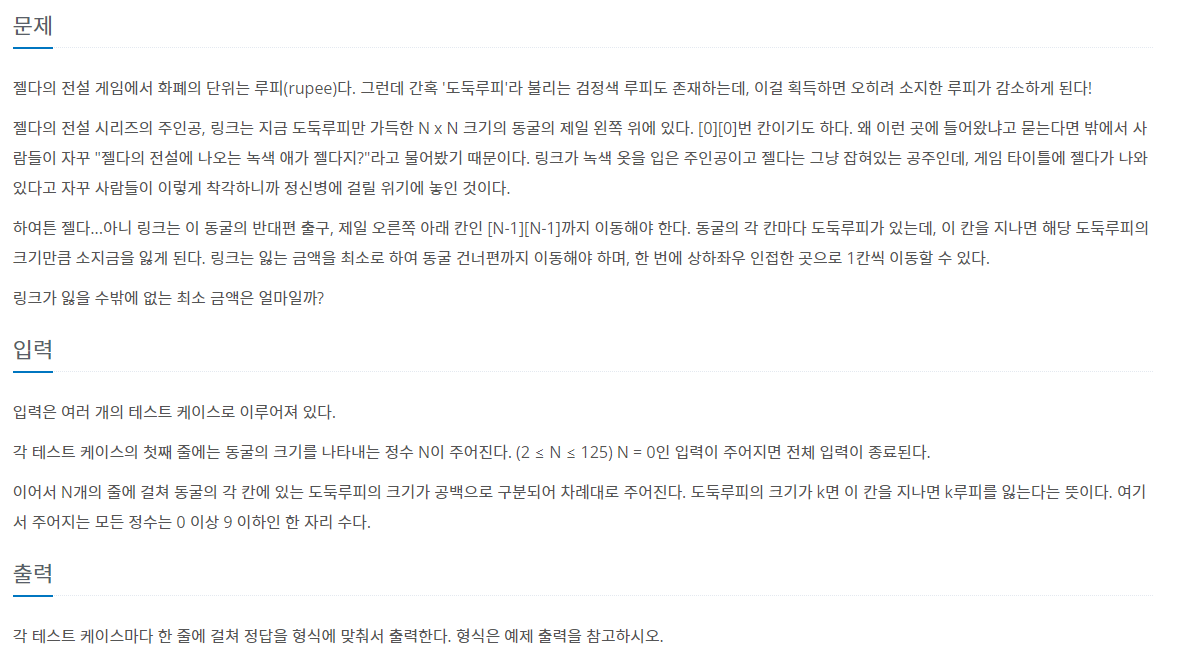

In [34]:
import sys
import heapq

# input = sys.stdin.readline
INF = int(1e9)

# 동서남북
dx = [0, 0, -1, 1]
dy = [-1, 1, 0, 0]


def dijkstra():
    q = []
    heapq.heappush(q, (graph[0][0], 0, 0)) # 도둑루피를 우선순위로
    distance[0][0] = 0

    while q:
        cost, x, y = heapq.heappop(q)

        if x == n - 1 and y == n - 1:
            print(f'Problem {number}: {distance[x][y]}')
            break

        for i in range(4):
            new_x = x + dx[i]
            new_y = y + dy[i]

            if 0 <= new_x < n and 0 <= new_y < n:
                new_cost = cost + graph[new_x][new_y]
                # 현재 노드를 거쳐서, 다른 노드로 이동하는 거리가 더 짧은 경우
                if new_cost < distance[new_x][new_y]:
                    distance[new_x][new_y] = new_cost
                    heapq.heappush(q, (new_cost, new_x, new_y))

number = 1

while True:
    n = int(input())
    if n == 0:
        break

    graph = [list(map(int, input().split())) for _ in range(n)]
    distance = [[INF] * n for _ in range(n)]

    dijkstra()
    number += 1

3
5 5 4
3 9 1
3 2 7
Problem 1: 20
5
3 7 2 0 1
2 8 0 9 1
1 2 1 8 1
9 8 9 2 0
3 6 5 1 5
Problem 2: 19
7
9 0 5 1 1 5 3
4 1 2 1 6 5 3
0 7 6 1 6 8 5
1 1 7 8 3 2 3
9 4 0 7 6 4 1 
5 8 3 2 4 8 3
7 4 8 4 8 3 4
Problem 3: 36
0


# 해킹
- https://www.acmicpc.net/problem/10282

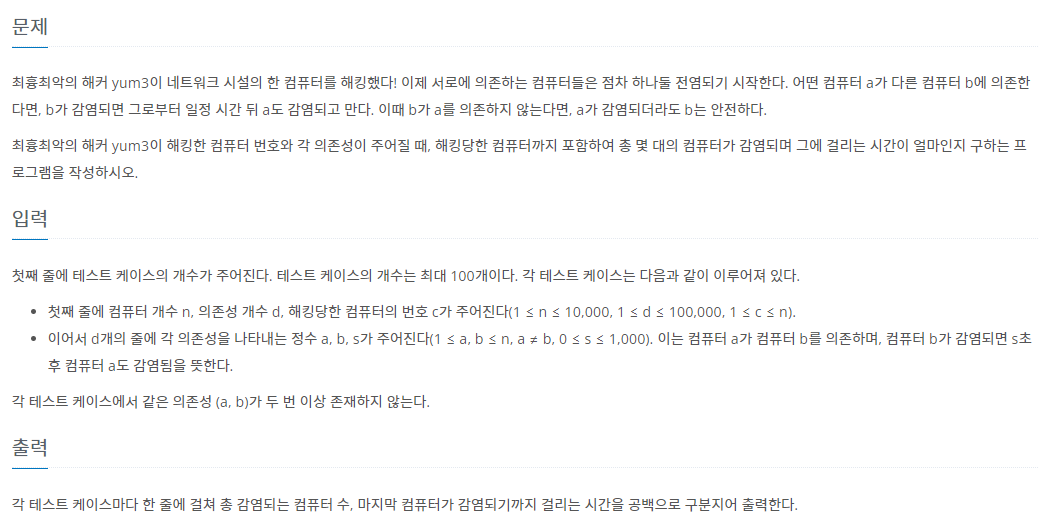

In [1]:
import sys
import heapq

input = sys.stdin.readline

INF = int(1e9)

def dijkstra(start):
    q = []
    # 시작 노드로 가기 위한 최단 경로는 0으로 설정하여, 큐에 삽입
    heapq.heappush(q, (0, start))
    distance[start] = 0
    while q: # 큐가 비어있지 않다면
        # 가장 최단 거리가 짧은 노드에 대한 정보 꺼내기
        dist, now = heapq.heappop(q)
        # 현재 노드가 이미 처리된 적이 있는 노드라면 무시
        if distance[now] < dist:
            continue
        # 현재 노드와 연결된 다른 인접한 노드들을 확인
        for i in graph[now]:
            cost = dist + i[1]
            # 현재 노드를 거쳐서, 다른 노드로 이동하는 거리가 더 짧은 경우
            if cost < distance[i[0]]:
                distance[i[0]] = cost
                heapq.heappush(q, (cost, i[0]))


t = int(input()) # 테스트 케이스
for i in range(t):
    # 노드(컴퓨터) 개수, 간선(의존성) 개수, 시작지점(해킹당한 컴퓨터 번호)
    n, d, c = map(int, input().split())

    graph = [[] for _ in range(n+1)]
    distance = [INF] * (n+1)

    for _ in range(d):
        a, b, s = map(int, input().split())
        graph[b].append((a, s))

    dijkstra(c)

    cnt = 0
    time = 0
    for i in distance:
        if i < INF: # 감염시킬 수 있는 컴퓨터
            cnt += 1
            time = max(i, time)
    
    print(cnt, time)

2
3 2 2
2 1 5
3 2 5
2 5
3 3 1
2 1 2
3 1 8
3 2 4
3 6


# 서강 그라운드
- https://www.acmicpc.net/problem/14938

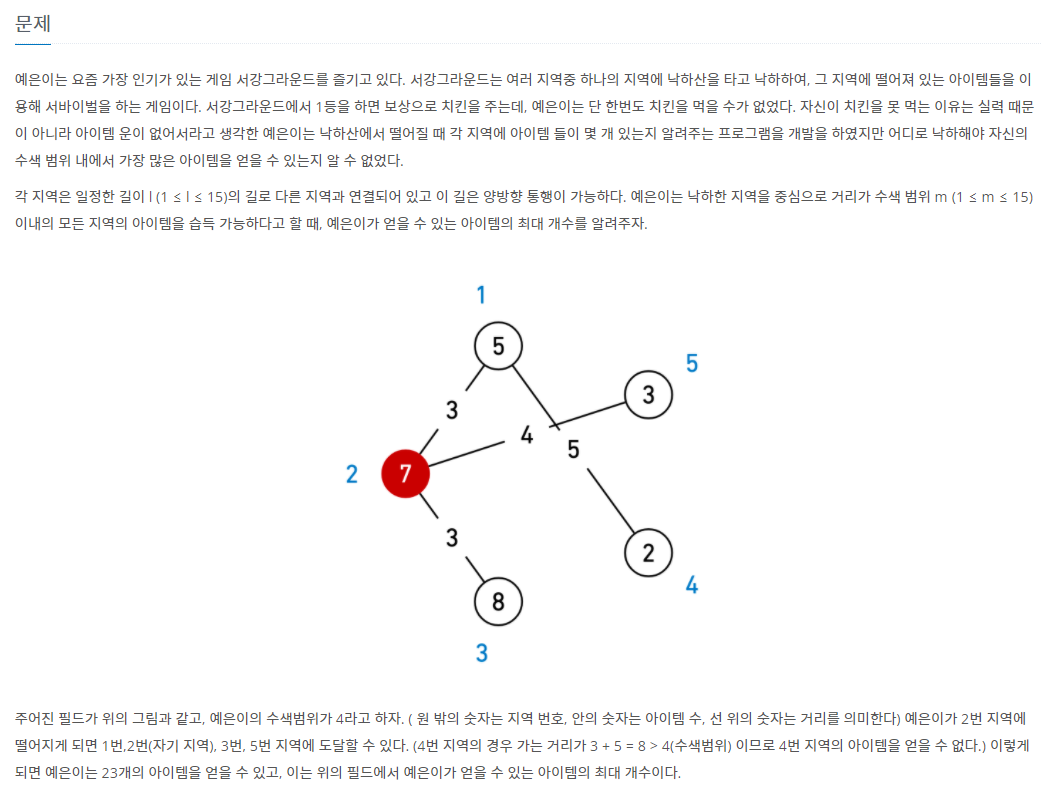

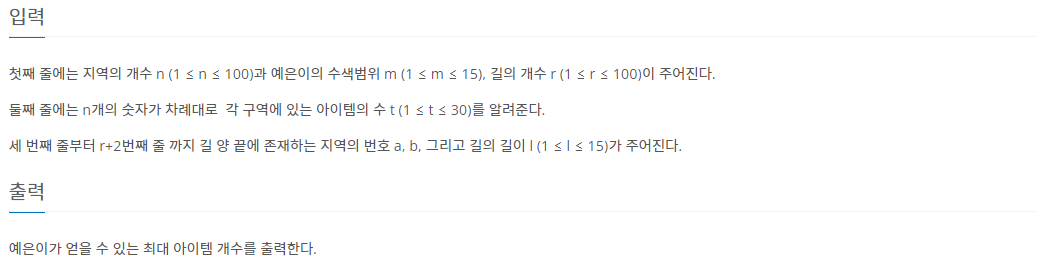

In [2]:
INF = int(1e9)
# 노드, 수색범위, 길의 개수
n, m, r = map(int, input().split())

# 아이템의 수
items = list(map(int, input().split()))
graph = [[INF] * (n+1) for _ in range(n+1)]


# 각 길의 길이에 대한 정보
for _ in range(r):
    a, b, c = map(int, input().split())
    graph[a][b] = graph[b][a] = c
    
for k in range(1, n+1):
    for a in range(1, n+1):
        for b in range(1, n+1):
            if a == b:
                graph[a][b] = 0
            graph[a][b] = min(graph[a][b], graph[a][k] + graph[k][b])

# 각 지역에서 수색범위내 얻을 수 있는 아이템의 개수
item = []
for i in range(1, n+1):
    total = 0
    for j in range(1, n+1):
        if graph[i][j] <= m:
            total += items[j-1]
    item.append(total)
    
print(max(item))

5 5 4
5 7 8 2 3
1 4 5
5 2 4
3 2 3
1 2 3
23
